### Pruebas con LightGlue

In [1]:
# If we are on colab: this clones the repo and installs the dependencies
from pathlib import Path

if Path.cwd().name != "LightGlue":
    !git clone --quiet https://github.com/cvg/LightGlue/
    %cd LightGlue
    !pip install --progress-bar off --quiet -e .

from lightglue import LightGlue, SuperPoint, DISK
from lightglue.utils import load_image, rbd
from lightglue import viz2d
import torch

torch.set_grad_enabled(False)
images = Path("assets")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # 'mps', 'cpu'

extractor = SuperPoint(max_num_keypoints=2048).eval().to(device)  # load the extractor
matcher = LightGlue(features="superpoint").eval().to(device)

image0 = load_image(images / "imagenes_productos/Biferdil_Tono_sobre_Tono.png")
image1 = load_image(images / "imagenes_gondolas/gondola biferdil.jpeg")

feats0 = extractor.extract(image0.to(device))
feats1 = extractor.extract(image1.to(device))
matches01 = matcher({"image0": feats0, "image1": feats1})
feats0, feats1, matches01 = [
    rbd(x) for x in [feats0, feats1, matches01]
]  # remove batch dimension

kpts0, kpts1, matches = feats0["keypoints"], feats1["keypoints"], matches01["matches"]
m_kpts0, m_kpts1 = kpts0[matches[..., 0]], kpts1[matches[..., 1]]

axes = viz2d.plot_images([image0, image1])
viz2d.plot_matches(m_kpts0, m_kpts1, color="lime", lw=0.2)
viz2d.add_text(0, f'Stop after {matches01["stop"]} layers', fs=20)

kpc0, kpc1 = viz2d.cm_prune(matches01["prune0"]), viz2d.cm_prune(matches01["prune1"])
viz2d.plot_images([image0, image1])
viz2d.plot_keypoints([kpts0, kpts1], colors=[kpc0, kpc1], ps=10)

/Users/manu/Proyecto Final/Proyecto-Final-Gondolieri/LightGlue


/Users/manu/Library/Python/3.9/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


ModuleNotFoundError: No module named 'torch'

### Cálculo de la resolución

In [24]:

import os
import cv2

# Obtener resoluciones de imágenes en una carpeta
def get_resolutions(image_folder):
    resolutions = []
    for image_name in os.listdir(image_folder):
        if image_name.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp', '.jfif')):  # Filtra los archivos de imagen
            image_path = os.path.join(image_folder, image_name)
            image = cv2.imread(image_path)
            if image is not None:
                # Obtener las dimensiones (alto y ancho)
                height, width = image.shape[:2]
                # Calcular la resolución (ancho * alto)
                resolution = width * height
                resolutions.append(resolution)
    return resolutions

# Función para obtener proporciones de aspecto de imágenes en una carpeta
def get_aspect_ratios(image_folder):
    aspect_ratios = []
    for image_name in os.listdir(image_folder):
        if image_name.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp', '.jfif')):  # Filtra los archivos de imagen
            image_path = os.path.join(image_folder, image_name)
            image = cv2.imread(image_path)
            if image is not None:
                # Obtener las dimensiones (alto y ancho)
                height, width = image.shape[:2]
                # Calcular la proporción de aspecto (ancho / alto)
                aspect_ratio = width / height
                aspect_ratios.append(aspect_ratio)
    return aspect_ratios


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


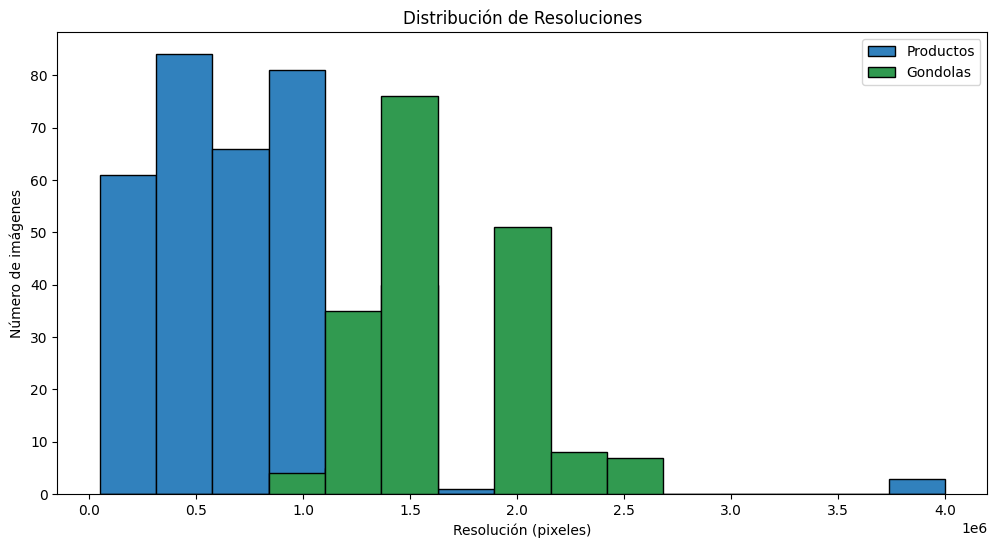

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


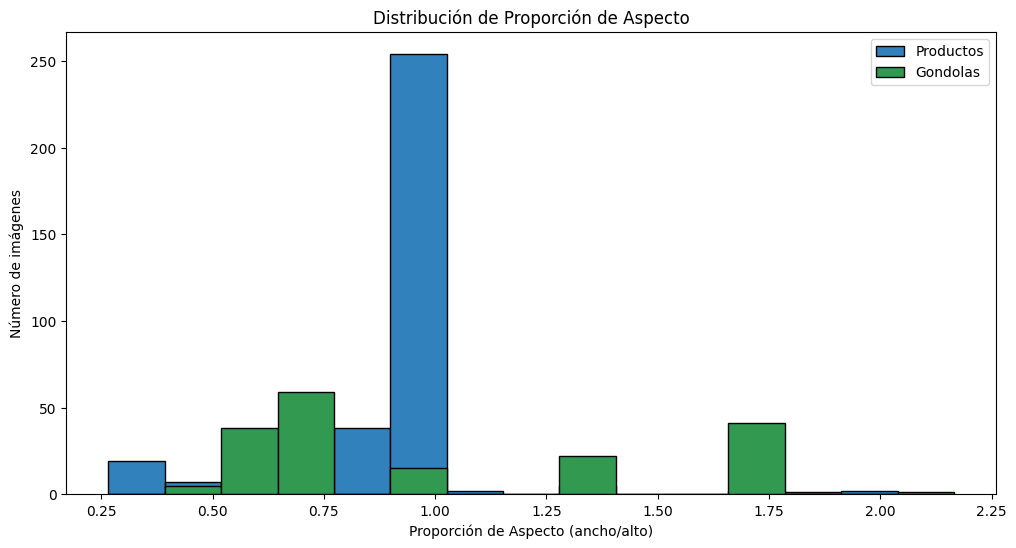

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ruta donde están almacenadas las imágenes
image_folder1 = '/Users/manu/Downloads/Imagenes Productos'
image_folder2 = '/Users/manu/Downloads/Mayo-Junio-Julio (teoricamente)'

# Lista para almacenar las resoluciones de cada imagen
resolutions1 = []
resolutions2 = []

# Obtener resoluciones de ambas carpetas
resolutions1.extend(get_resolutions(image_folder1))
resolutions2.extend(get_resolutions(image_folder2))

# Crear un DataFrame para las resoluciones
df_resolutions1 = pd.DataFrame(resolutions1, columns=['Resolución'])
df_resolutions2 = pd.DataFrame(resolutions2, columns=['Resolución'])

# Crear una paleta de colores
palette1 = sns.color_palette("Blues", n_colors=15)
palette2 = sns.color_palette("Greens", n_colors=15)

# Calcular los límites de los ejes y los bins compartidos para las resoluciones
min_resolution = min(df_resolutions1['Resolución'].min(), df_resolutions2['Resolución'].min())
max_resolution = max(df_resolutions1['Resolución'].max(), df_resolutions2['Resolución'].max())
bins = np.linspace(min_resolution, max_resolution, 16)  # 10 bins

# Crear un histograma de resoluciones usando Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(df_resolutions1, x='Resolución', bins=bins, color=palette1[10], edgecolor='black', label='Productos', alpha=1)
sns.histplot(df_resolutions2, x='Resolución', bins=bins, color=palette2[10], edgecolor='black', label='Gondolas', alpha=1)
plt.title('Distribución de Resoluciones')
plt.xlabel('Resolución (pixeles)')
plt.ylabel('Número de imágenes')
plt.legend()
plt.show()

# Lista para almacenar las proporciones de aspecto
aspect_ratios1 = []
aspect_ratios2 = []

# Obtener proporciones de aspecto de ambas carpetas
aspect_ratios1.extend(get_aspect_ratios(image_folder1))
aspect_ratios2.extend(get_aspect_ratios(image_folder2))

# Crear un DataFrame para las proporciones de aspecto
df_aspect_ratios1 = pd.DataFrame(aspect_ratios1, columns=['Proporción de Aspecto'])
df_aspect_ratios2 = pd.DataFrame(aspect_ratios2, columns=['Proporción de Aspecto'])

# Calcular los límites de los ejes y los bins compartidos para las proporciones de aspecto
min_aspect_ratio = min(df_aspect_ratios1['Proporción de Aspecto'].min(), df_aspect_ratios2['Proporción de Aspecto'].min())
max_aspect_ratio = max(df_aspect_ratios1['Proporción de Aspecto'].max(), df_aspect_ratios2['Proporción de Aspecto'].max())
bins_aspect_ratio = np.linspace(min_aspect_ratio, max_aspect_ratio, 16)  # 10 bins

# Crear un histograma de proporción de aspecto usando Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(df_aspect_ratios1, x='Proporción de Aspecto', bins=bins_aspect_ratio, color=palette1[10], edgecolor='black', label='Productos', alpha=1)
sns.histplot(df_aspect_ratios2, x='Proporción de Aspecto', bins=bins_aspect_ratio, color=palette2[10], edgecolor='black', label='Gondolas', alpha=1)
plt.title('Distribución de Proporción de Aspecto')
plt.xlabel('Proporción de Aspecto (ancho/alto)')
plt.ylabel('Número de imágenes')
plt.legend()
plt.show()

In [11]:
import os

# Definir las rutas de las carpetas
image_folder1 = '/Users/manu/Downloads/Imagenes Productos'
image_folder2 = '/Users/manu/Downloads/Mayo-Junio-Julio (teoricamente)'

# Función para contar imágenes en una carpeta
def count_images(folder):
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp', '.jfif')
    return len([file for file in os.listdir(folder) if file.lower().endswith(image_extensions)])

# Contar imágenes en cada carpeta
count1 = count_images(image_folder1)
count2 = count_images(image_folder2)

# Imprimir los resultados
print(f'Número de imágenes en "{image_folder1}": {count1}')
print(f'Número de imágenes en "{image_folder2}": {count2}')

Número de imágenes en "/Users/manu/Downloads/Imagenes Productos": 343
Número de imágenes en "/Users/manu/Downloads/Mayo-Junio-Julio (teoricamente)": 181


### Análisis de Color

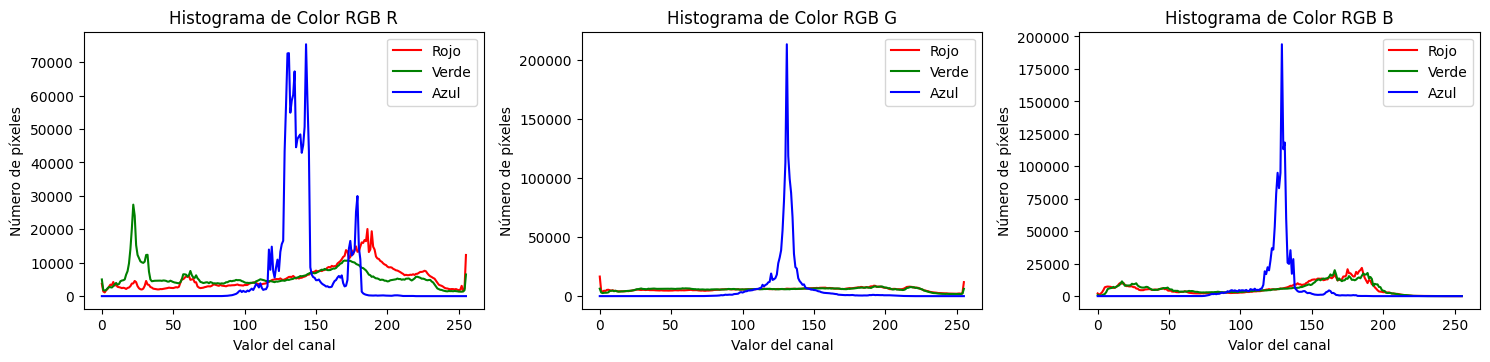

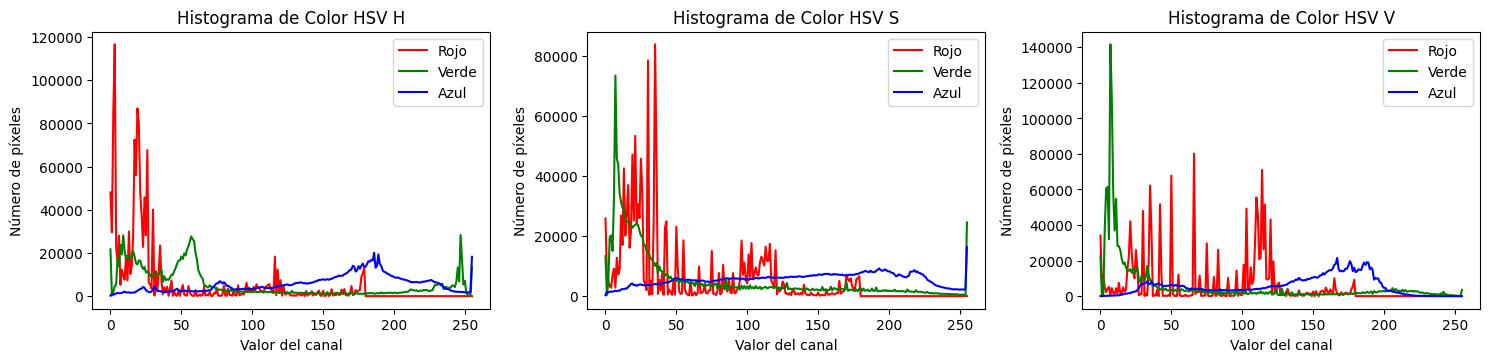

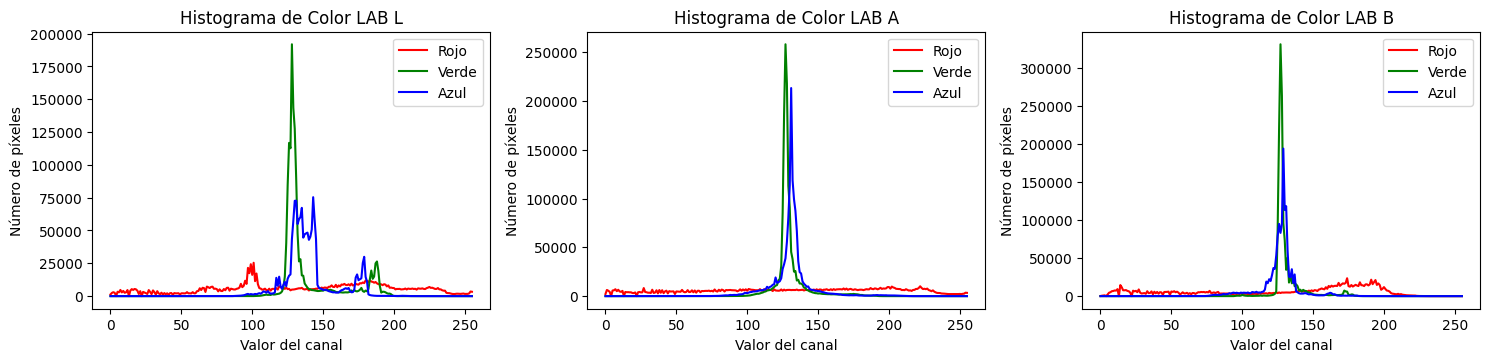

In [9]:

import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Ruta donde están almacenadas las imágenes
image_folder = '/Users/manu/Downloads/Mayo-Junio-Julio (teoricamente)'

# Listas para almacenar los histogramas
histograms_rgb = []
histograms_hsv = []
histograms_lab = []

# Función para calcular histogramas de color
def calcular_histogramas(imagen):
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
    imagen_lab = cv2.cvtColor(imagen, cv2.COLOR_BGR2LAB)

    hist_r = cv2.calcHist([imagen_rgb], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([imagen_rgb], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([imagen_rgb], [2], None, [256], [0, 256])

    hist_h = cv2.calcHist([imagen_hsv], [0], None, [256], [0, 256])
    hist_s = cv2.calcHist([imagen_hsv], [1], None, [256], [0, 256])
    hist_v = cv2.calcHist([imagen_hsv], [2], None, [256], [0, 256])

    hist_l = cv2.calcHist([imagen_lab], [0], None, [256], [0, 256])
    hist_a = cv2.calcHist([imagen_lab], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([imagen_lab], [2], None, [256], [0, 256])

    return (hist_r, hist_g, hist_b), (hist_h, hist_s, hist_v), (hist_l, hist_a, hist_b)

# Iterar sobre las imágenes en la carpeta
for image_name in os.listdir(image_folder):
    if image_name.endswith(('.png', '.jpg', '.jpeg')):  # Filtra los archivos de imagen
        image_path = os.path.join(image_folder, image_name)
        image = cv2.imread(image_path)
        
        if image is not None:
            hist_rgb, hist_hsv, hist_lab = calcular_histogramas(image)
            histograms_rgb.append(hist_rgb)
            histograms_hsv.append(hist_hsv)
            histograms_lab.append(hist_lab)

# Función para graficar histogramas
def plot_histogramas(histogramas, titulo, colores):
    plt.figure(figsize=(15, 10))
    for i, (hist, color) in enumerate(zip(histogramas, colores)):
        plt.subplot(3, 3, i+1)
        plt.plot(hist[0], color='red', label='Rojo')
        plt.plot(hist[1], color='green', label='Verde')
        plt.plot(hist[2], color='blue', label='Azul')
        plt.title(f'{titulo} {color}')
        plt.xlabel('Valor del canal')
        plt.ylabel('Número de píxeles')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Colores de la paleta para las gráficas
colores_paleta = ['RGB', 'HSV', 'LAB']

# Graficar histogramas de color en espacios RGB, HSV y LAB
plot_histogramas(histograms_rgb, 'Histograma de Color RGB', colores_paleta[0])
plot_histogramas(histograms_hsv, 'Histograma de Color HSV', colores_paleta[1])
plot_histogramas(histograms_lab, 'Histograma de Color LAB', colores_paleta[2])


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


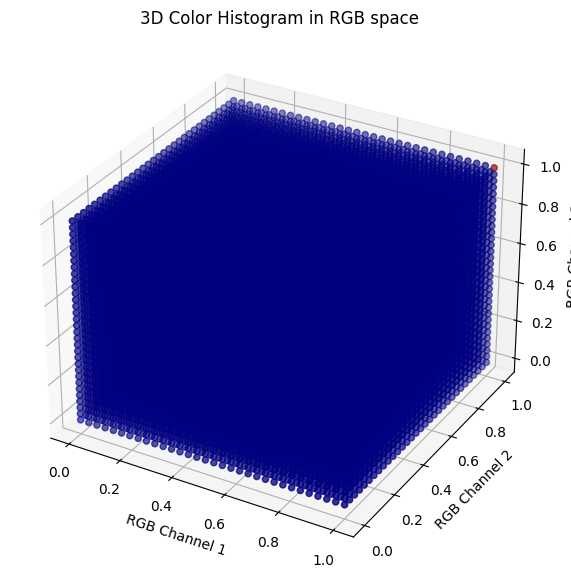

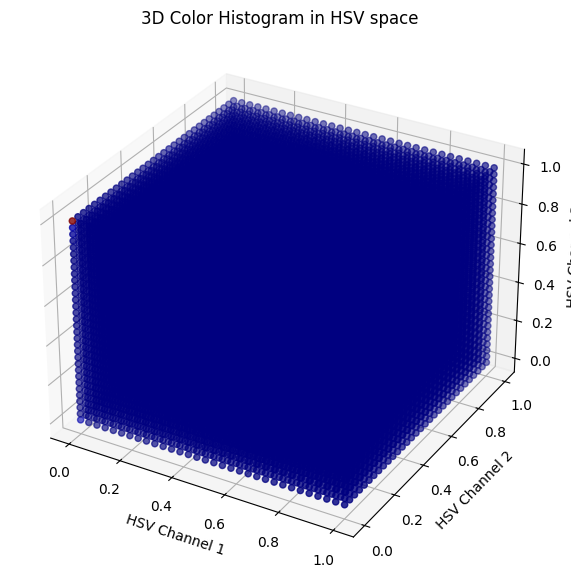

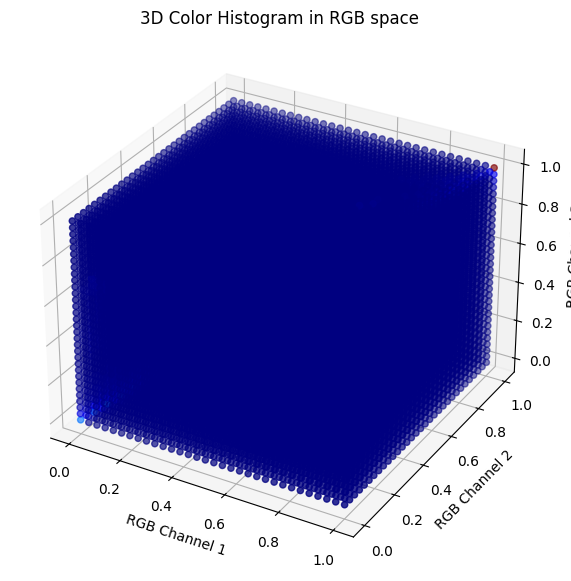

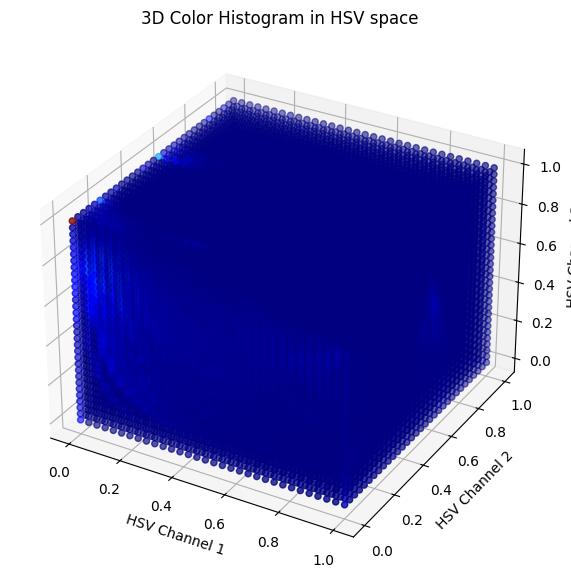

In [41]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Función para generar un histograma 3D de color
def generate_color_histogram(image_path, color_space='RGB'):
    # Leer la imagen
    image = cv2.imread(image_path)
    if color_space == 'HSV':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Separar los canales
    channel_1, channel_2, channel_3 = cv2.split(image)
    
    # Crear un histograma 3D de color
    hist, edges = np.histogramdd((channel_1.ravel(), channel_2.ravel(), channel_3.ravel()), bins=(32, 32, 32))
    return hist

# Función para graficar en 3D
def plot_3d_histogram(hist, color_space='RGB'):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Crear la matriz de coordenadas para el histograma
    _x = np.linspace(0, 1, hist.shape[0])
    _y = np.linspace(0, 1, hist.shape[1])
    _z = np.linspace(0, 1, hist.shape[2])
    _x, _y, _z = np.meshgrid(_x, _y, _z)
    
    # Graficar
    ax.scatter(_x, _y, _z, c=hist.ravel(), cmap='jet', marker='o')
    
    ax.set_xlabel(f'{color_space} Channel 1')
    ax.set_ylabel(f'{color_space} Channel 2')
    ax.set_zlabel(f'{color_space} Channel 3')
    
    plt.title(f'3D Color Histogram in {color_space} space')
    plt.show()

# Función para procesar todas las imágenes en una carpeta
def process_images_in_folder(folder_path, color_space='RGB'):
    all_histograms = []
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            hist = generate_color_histogram(image_path, color_space=color_space)
            all_histograms.append(hist)
    return np.sum(all_histograms, axis=0)

# Rutas a las carpetas de las imágenes
image_folder1 = '/Users/manu/Downloads/Imagenes Productos'
image_folder2 = '/Users/manu/Downloads/Mayo-Junio-Julio (teoricamente)'

# Análisis de color para el primer conjunto de datos
histogram1_rgb = process_images_in_folder(image_folder1, color_space='RGB')
histogram1_hsv = process_images_in_folder(image_folder1, color_space='HSV')

# Análisis de color para el segundo conjunto de datos
histogram2_rgb = process_images_in_folder(image_folder2, color_space='RGB')
histogram2_hsv = process_images_in_folder(image_folder2, color_space='HSV')

# Graficar los histogramas en 3D
plot_3d_histogram(histogram1_rgb, color_space='RGB')
plot_3d_histogram(histogram1_hsv, color_space='HSV')

plot_3d_histogram(histogram2_rgb, color_space='RGB')
plot_3d_histogram(histogram2_hsv, color_space='HSV')


### Calculo de bordes

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


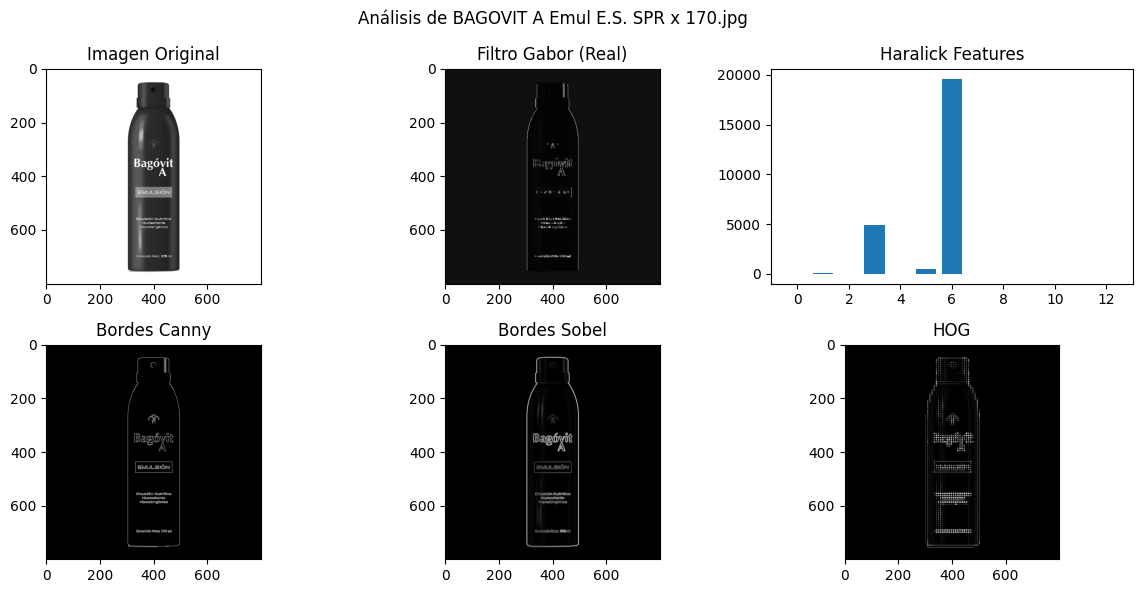

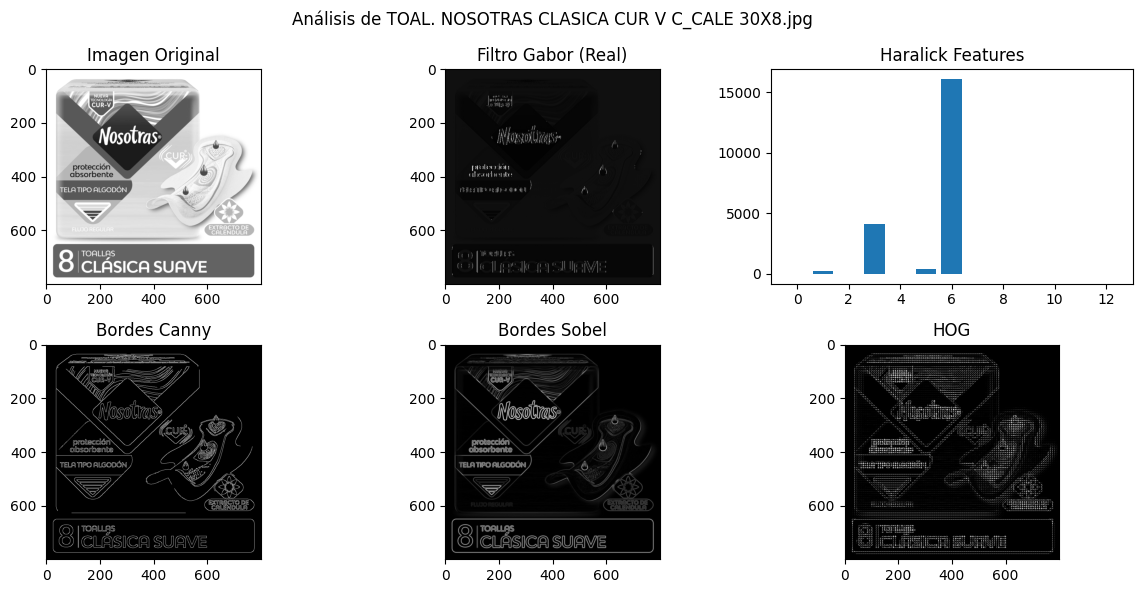

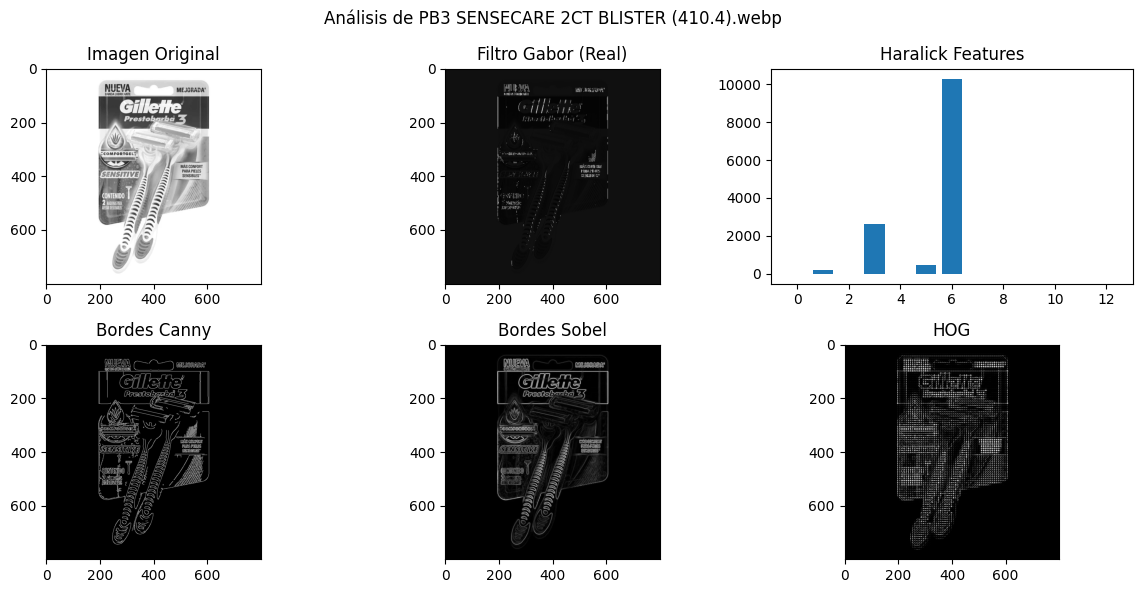

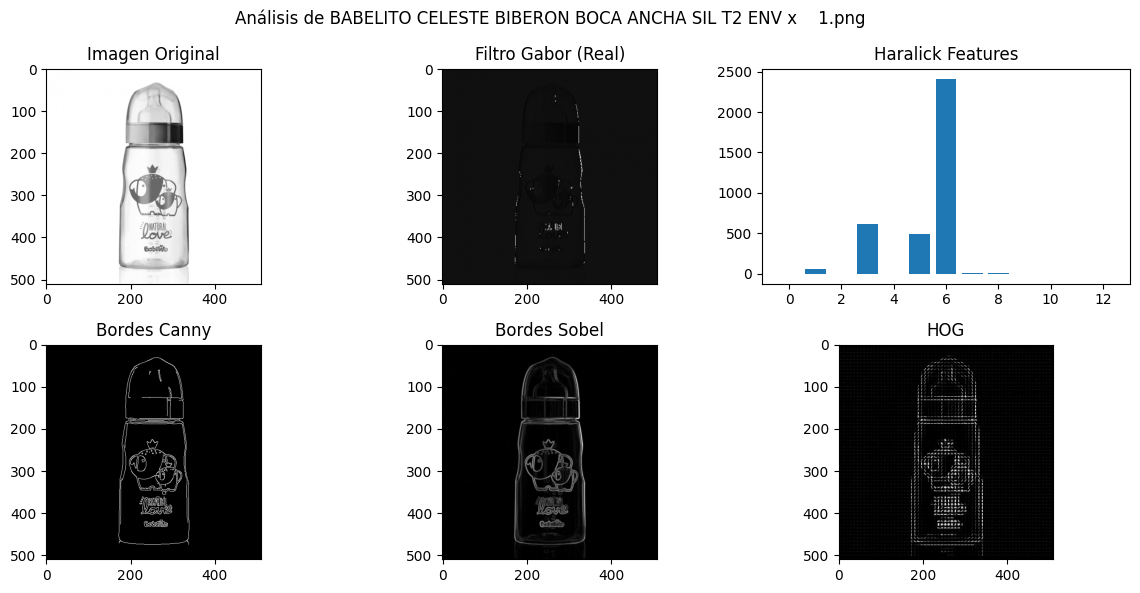

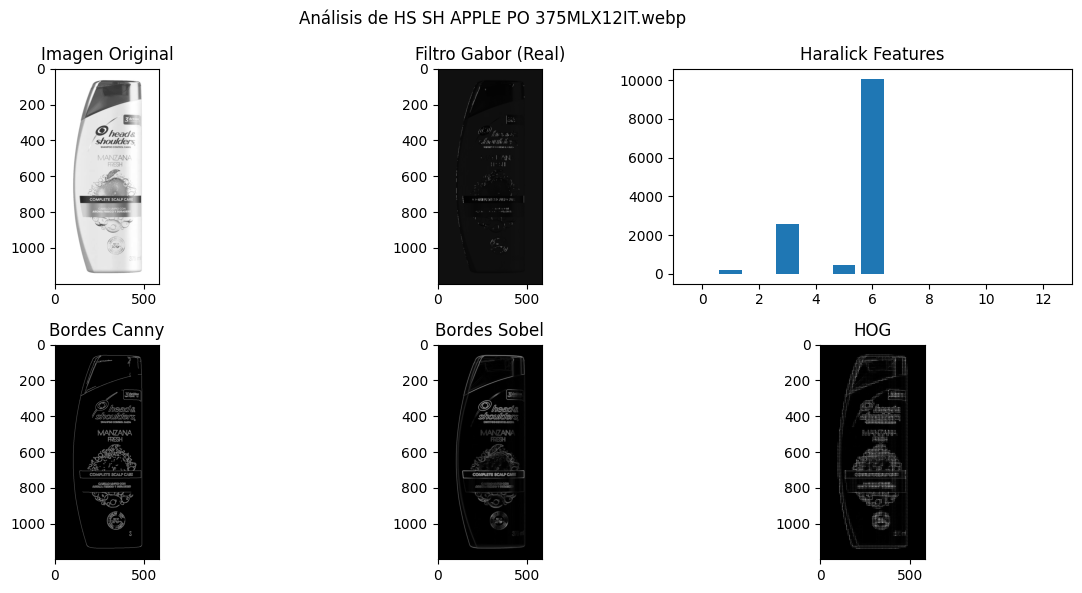

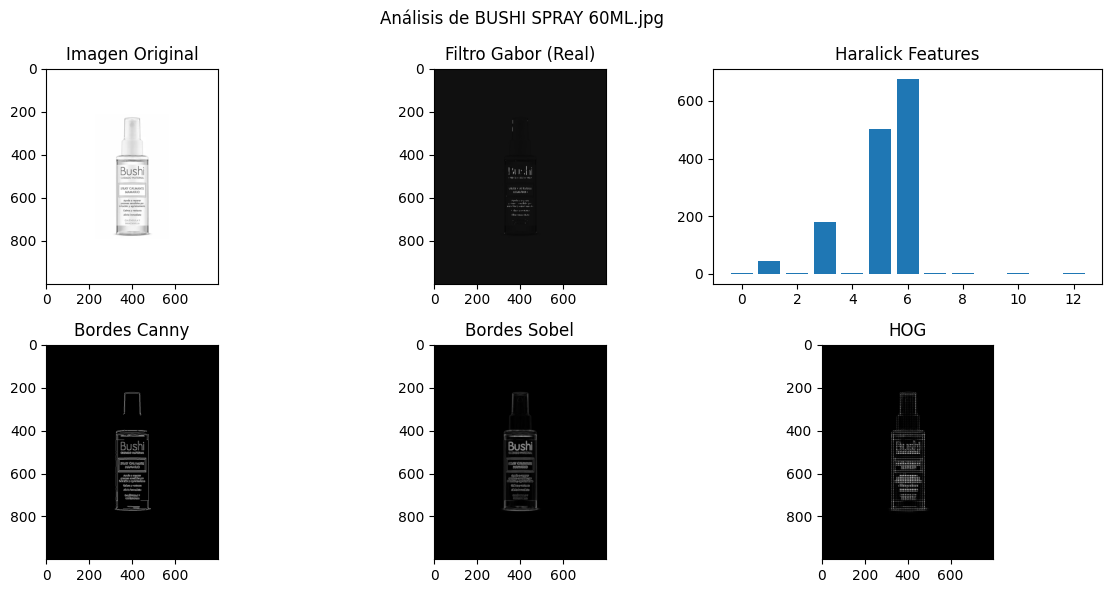

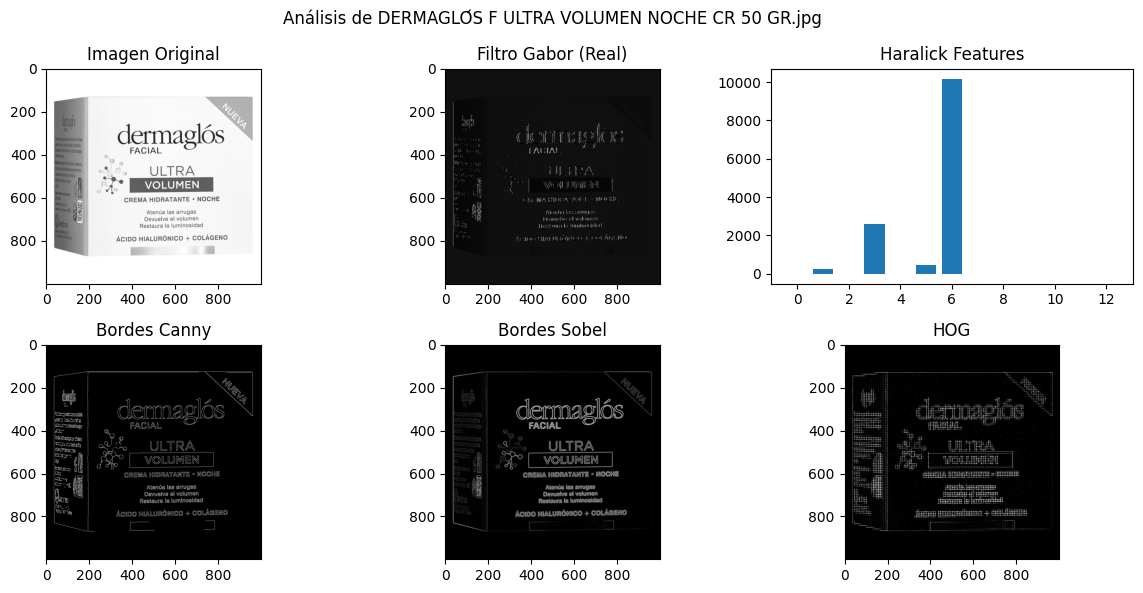

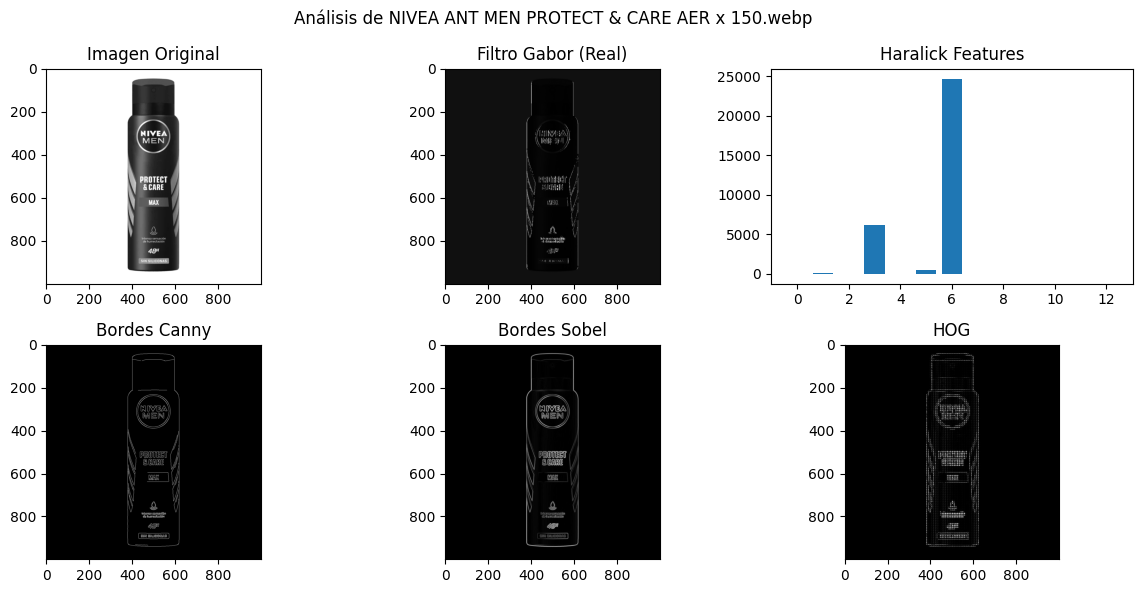

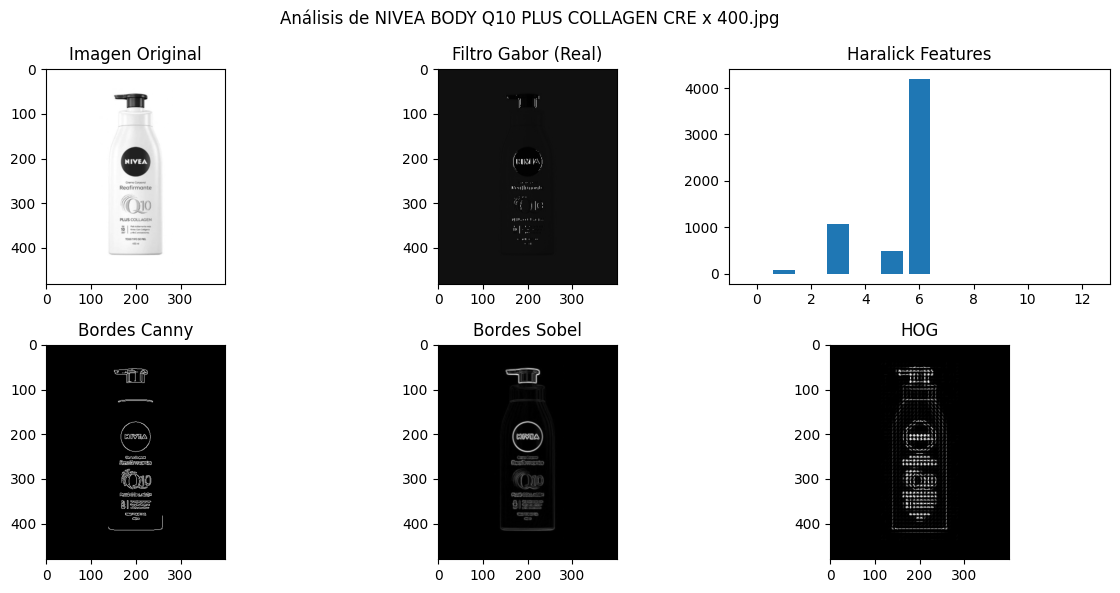

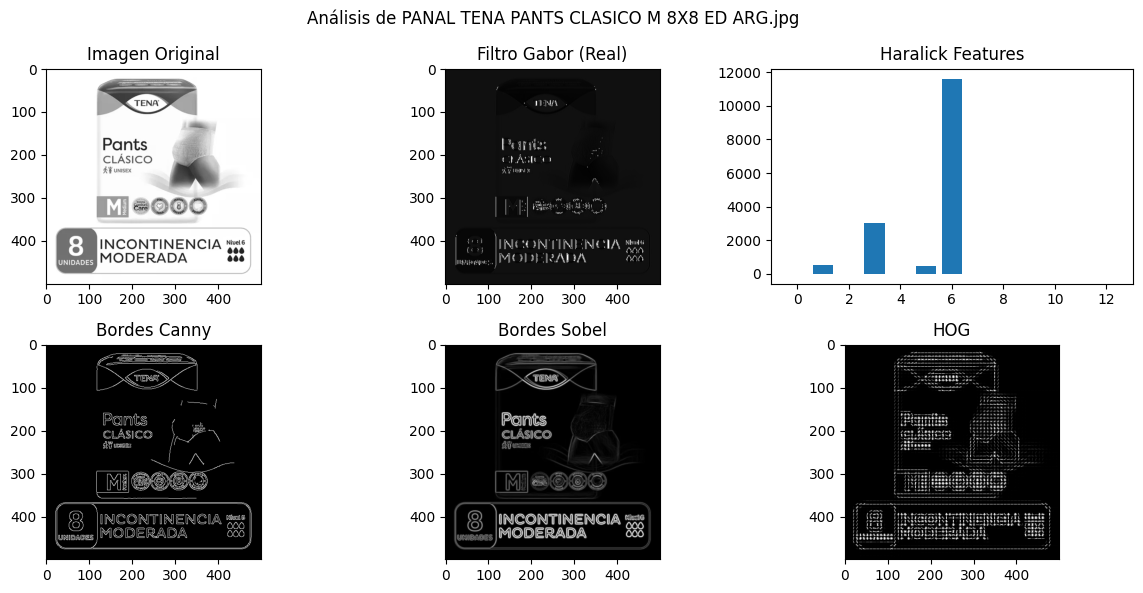

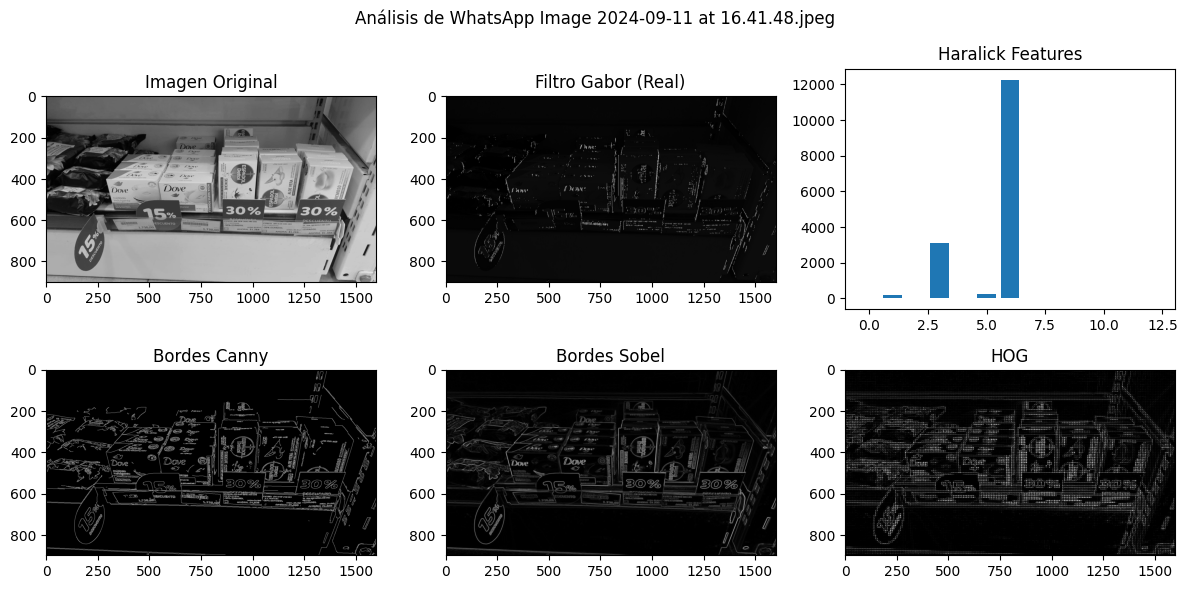

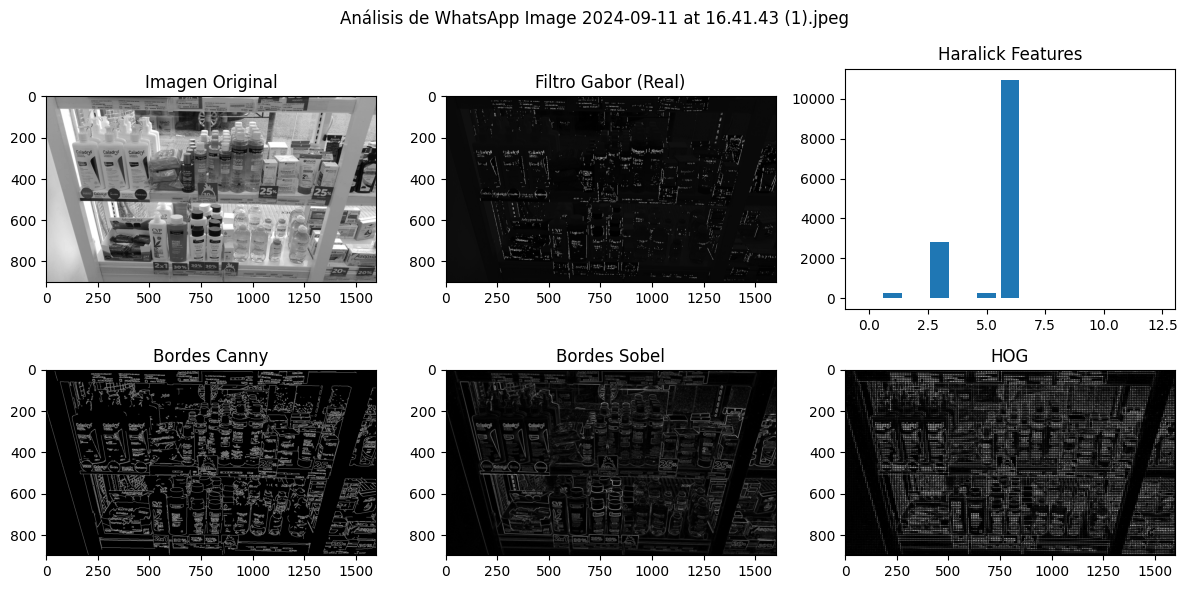

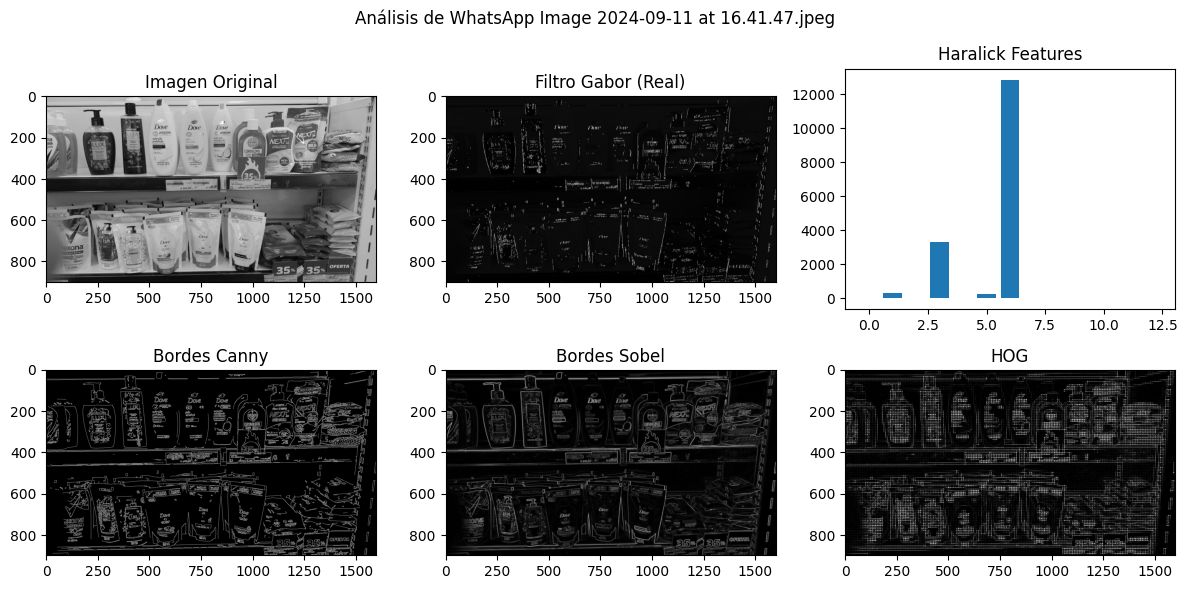

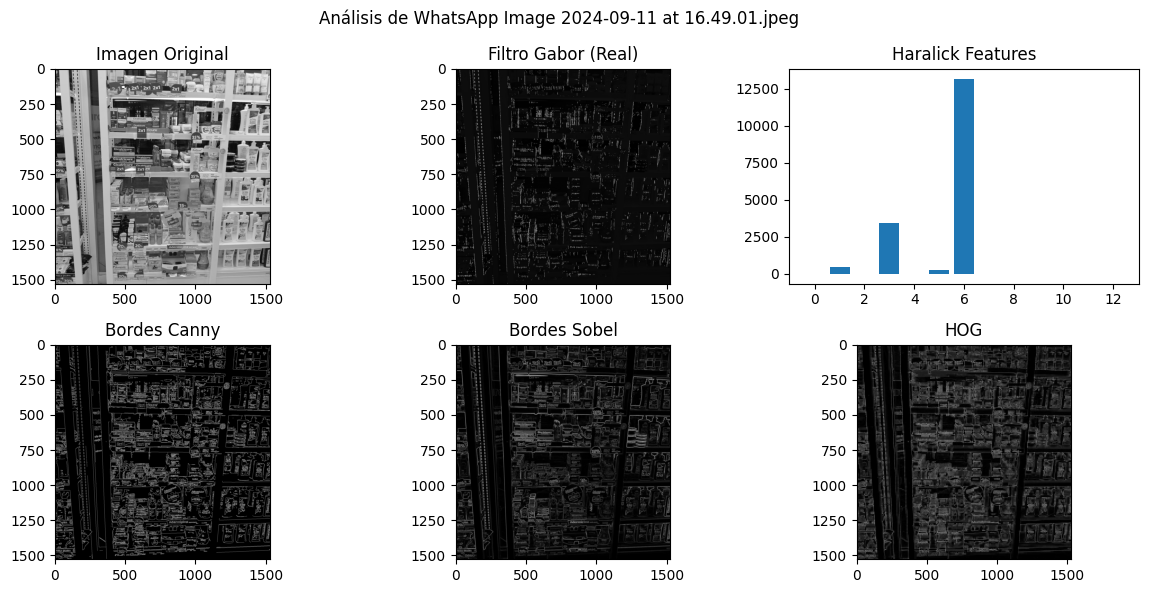

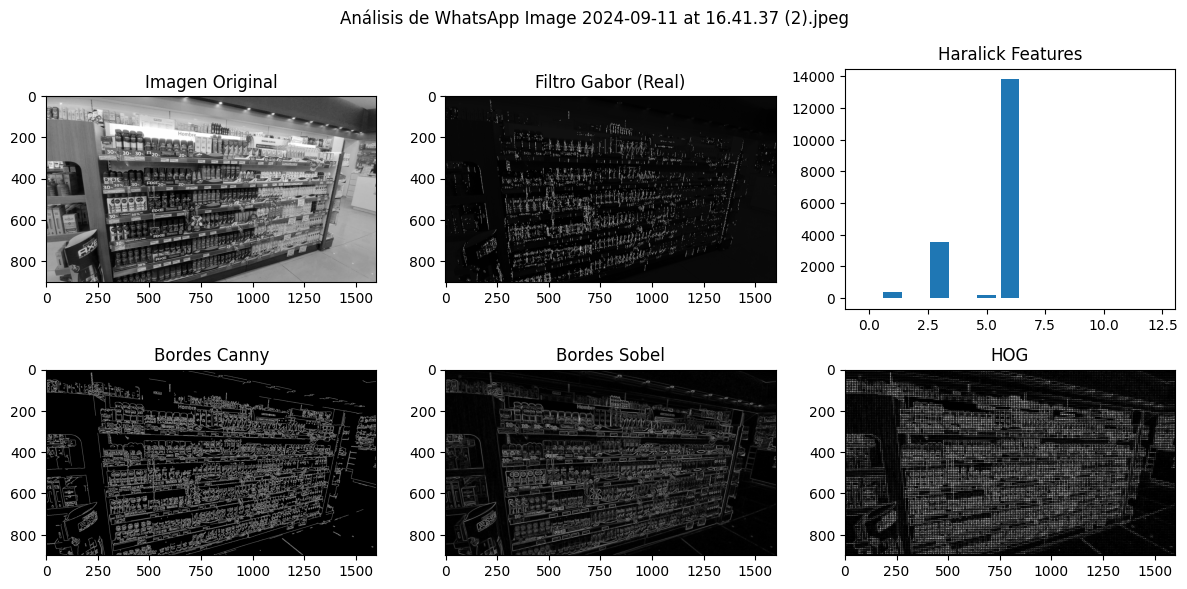

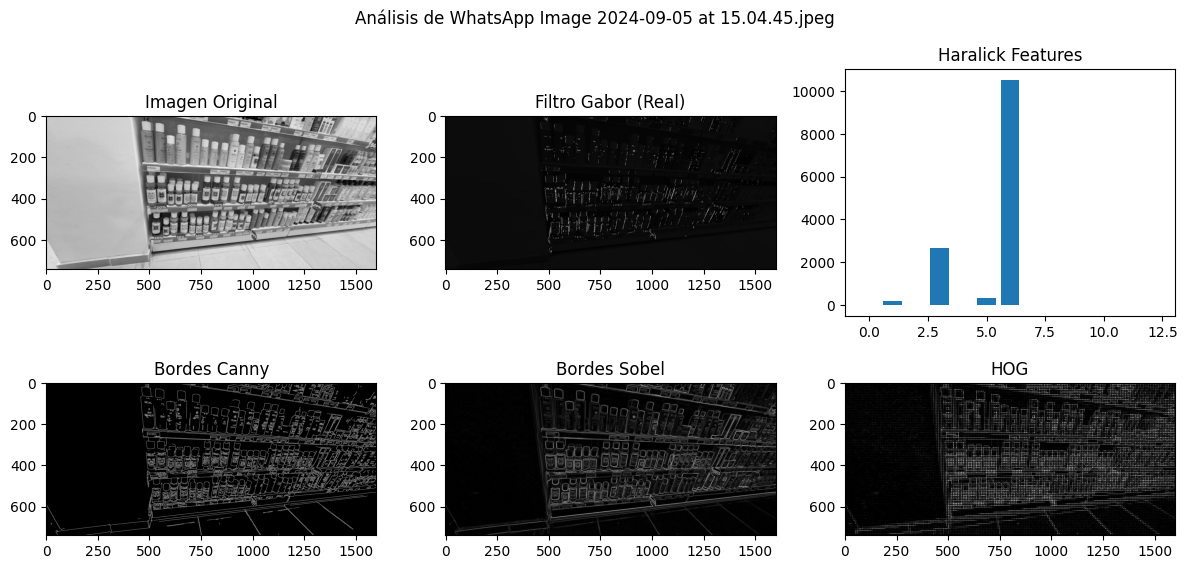

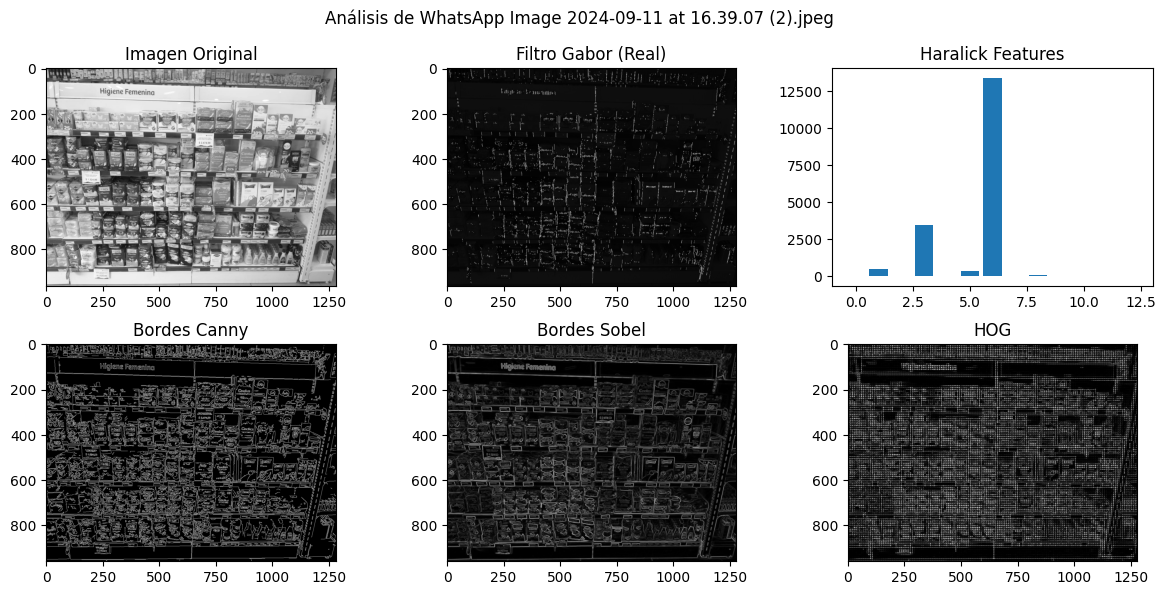

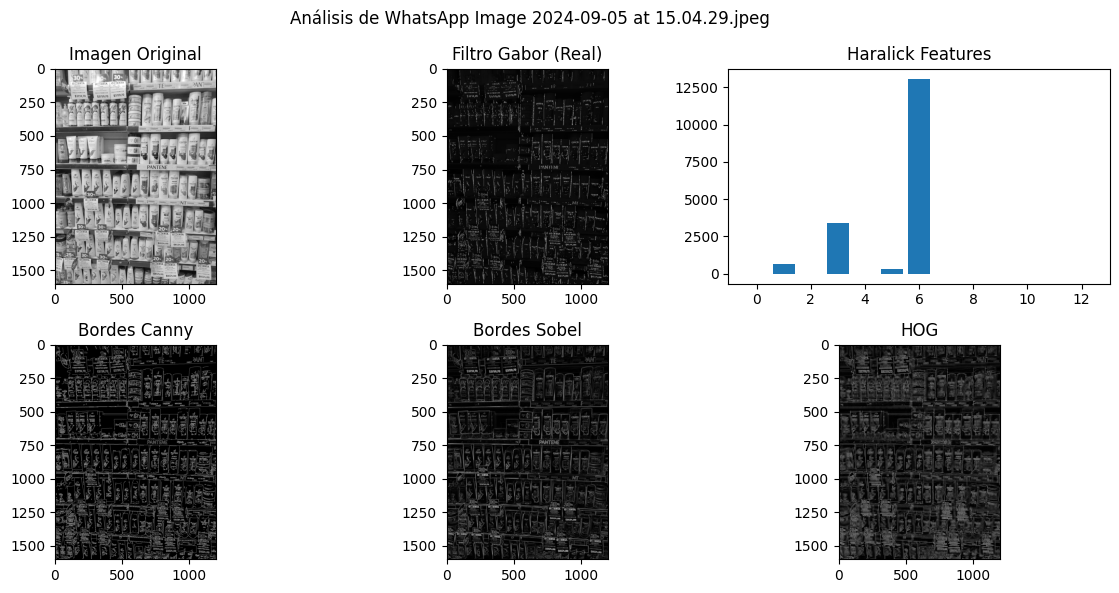

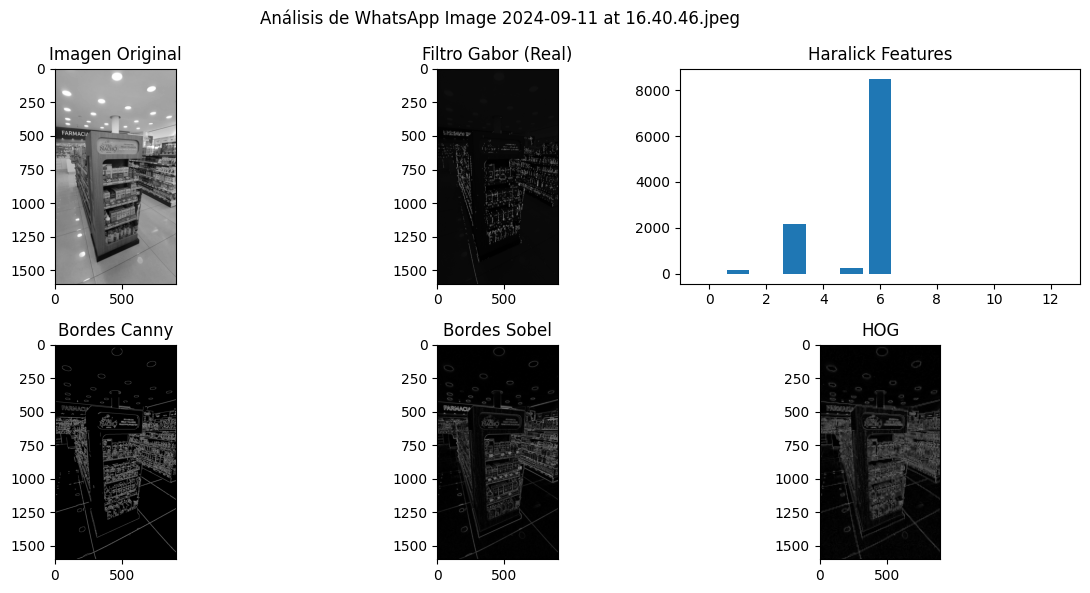

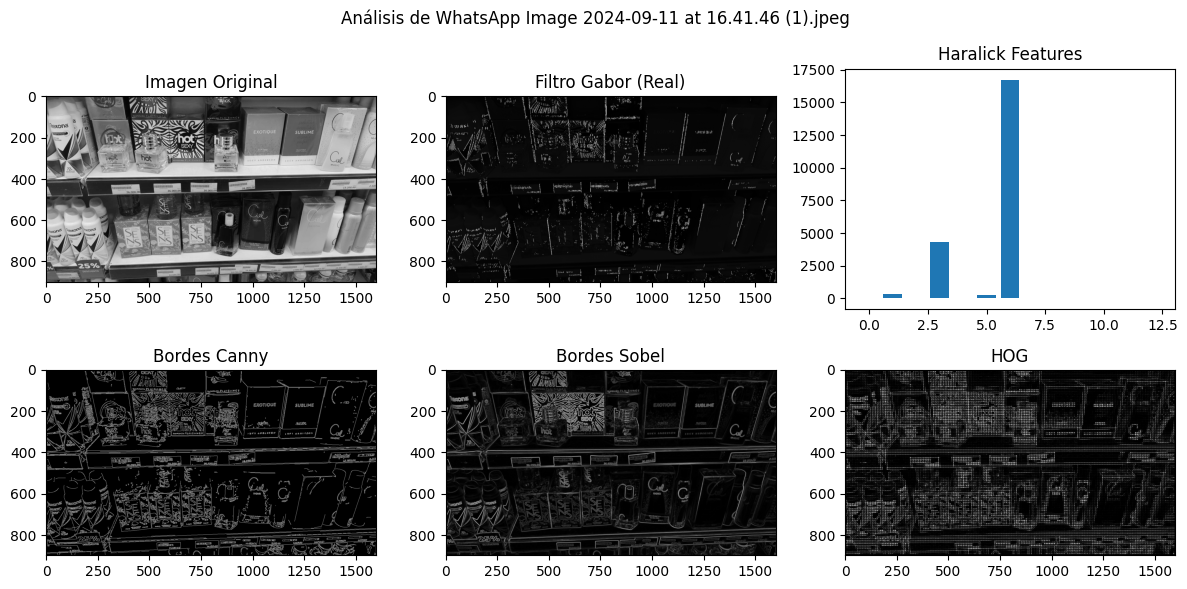

In [47]:
#%pip install scikit-image mahotas
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gabor
from skimage.feature import hog
from skimage import exposure
import mahotas as mh

# Definir las rutas de las carpetas
image_folder1 = '/Users/manu/Downloads/Imagenes Productos'
image_folder2 = '/Users/manu/Downloads/Mayo-Junio-Julio (teoricamente)'

# Función para leer todas las imágenes de una carpeta
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append((filename, img))
    return images

# Función para extraer una muestra aleatoria de imágenes
def sample_images(images, sample_size):
    return random.sample(images, sample_size)

# Función para extracción de texturas con Gabor y Haralick
def analyze_textures(image):
    # Gabor
    gabor_filtered_real, gabor_filtered_imaginary = gabor(image, frequency=0.6)
    
    # Haralick
    haralick_features = mh.features.haralick(image).mean(axis=0)
    
    return gabor_filtered_real, haralick_features

# Función para detección de bordes con Canny y Sobel
def detect_edges(image):
    # Canny
    edges_canny = cv2.Canny(image, 100, 200)
    
    # Sobel
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    edges_sobel = np.sqrt(sobelx**2 + sobely**2)
    
    return edges_canny, edges_sobel

# Función para calcular HOG
def compute_hog(image):
    if len(image.shape) != 2:
        raise ValueError("La imagen debe ser en escala de grises y tener dos dimensiones.")
    
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    return fd, hog_image_rescaled

# Leer imágenes de las carpetas
images1 = load_images_from_folder(image_folder1)
images2 = load_images_from_folder(image_folder2)

# Definir el tamaño de la muestra
sample_size = 10  # Elige cuántas imágenes quieres muestrear de cada carpeta

# Tomar una muestra aleatoria de cada conjunto de imágenes
sample_images1 = sample_images(images1, sample_size)
sample_images2 = sample_images(images2, sample_size)

# Procesar la muestra de imágenes
for sample_images, folder in [(sample_images1, image_folder1), (sample_images2, image_folder2)]:
    for filename, image in sample_images:
        # Análisis de texturas
        gabor_filtered, haralick_features = analyze_textures(image)
        
        # Detección de bordes
        edges_canny, edges_sobel = detect_edges(image)
        
        # Histogramas de Gradientes (HOG)
        fd, hog_image = compute_hog(image)
        
        # Mostrar resultados
        plt.figure(figsize=(12, 6))
        plt.suptitle(f'Análisis de {filename}')
        
        plt.subplot(2, 3, 1)
        plt.title('Imagen Original')
        plt.imshow(image, cmap='gray')
        
        plt.subplot(2, 3, 2)
        plt.title('Filtro Gabor (Real)')
        plt.imshow(gabor_filtered, cmap='gray')
        
        plt.subplot(2, 3, 3)
        plt.title('Haralick Features')
        plt.bar(range(len(haralick_features)), haralick_features)
        
        plt.subplot(2, 3, 4)
        plt.title('Bordes Canny')
        plt.imshow(edges_canny, cmap='gray')
        
        plt.subplot(2, 3, 5)
        plt.title('Bordes Sobel')
        plt.imshow(edges_sobel, cmap='gray')
        
        plt.subplot(2, 3, 6)
        plt.title('HOG')
        plt.imshow(hog_image, cmap='gray')
        
        plt.tight_layout()
        plt.show()


### Aspectos extra

In [49]:
import os
import cv2
import numpy as np
from skimage.measure import shannon_entropy

# Funciones para los análisis

def calcular_entropia(image):
    # Calcular entropía de una imagen en escala de grises
    return shannon_entropy(image)

def evaluar_ruido(image):
    # Calcular varianza para evaluar el ruido
    return np.var(image)

def analizar_simetria(image):
    # Voltear horizontalmente la imagen y calcular la diferencia
    flipped = cv2.flip(image, 1)
    diferencia = np.sum(np.abs(image - flipped))
    return diferencia

def procesar_imagenes(image_folder):
    entropias = []
    ruidos = []
    simetrias = []
    
    for filename in os.listdir(image_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            image_path = os.path.join(image_folder, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            # Calcular métricas
            entropia = calcular_entropia(image)
            ruido = evaluar_ruido(image)
            simetria = analizar_simetria(image)
            
            entropias.append(entropia)
            ruidos.append(ruido)
            simetrias.append(simetria)
    
    # Calcular estadísticas generales
    resultados_generales = {
        'entropia_media': np.mean(entropias),
        'entropia_std': np.std(entropias),
        'ruido_media': np.mean(ruidos),
        'ruido_std': np.std(ruidos),
        'simetria_media': np.mean(simetrias),
        'simetria_std': np.std(simetrias)
    }
    
    return resultados_generales

# Carpetas de imágenes
image_folder1 = '/Users/manu/Downloads/Imagenes Productos'
image_folder2 = '/Users/manu/Downloads/Mayo-Junio-Julio (teoricamente)'

# Procesar ambas carpetas
resultados_folder1 = procesar_imagenes(image_folder1)
resultados_folder2 = procesar_imagenes(image_folder2)

# Función para imprimir resultados de análisis
def imprimir_resultados_generales(resultados, folder_name):
    print(f"\nResultados generales para {folder_name}:")
    print(f"  - Entropía media: {resultados['entropia_media']:.4f}")
    print(f"  - Desviación estándar de entropía: {resultados['entropia_std']:.4f}")
    print(f"  - Ruido medio: {resultados['ruido_media']:.4f}")
    print(f"  - Desviación estándar de ruido: {resultados['ruido_std']:.4f}")
    print(f"  - Simetría media: {resultados['simetria_media']:.4f}")
    print(f"  - Desviación estándar de simetría: {resultados['simetria_std']:.4f}")

# Imprimir resultados generales
imprimir_resultados_generales(resultados_folder1, "Imagenes Productos")
imprimir_resultados_generales(resultados_folder2, "Mayo-Junio-Julio")



libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile



Resultados generales para Imagenes Productos:
  - Entropía media: 3.3266
  - Desviación estándar de entropía: 1.3272
  - Ruido medio: 2826.5090
  - Desviación estándar de ruido: 2872.2429
  - Simetría media: 35489128.3361
  - Desviación estándar de simetría: 33441665.4178

Resultados generales para Mayo-Junio-Julio:
  - Entropía media: 7.6002
  - Desviación estándar de entropía: 0.1826
  - Ruido medio: 3281.3506
  - Desviación estándar de ruido: 664.1021
  - Simetría media: 202290553.6354
  - Desviación estándar de simetría: 47248633.9172
